In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from faker import Faker
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold,cross_val_score
import warnings

In [2]:
#loading the dataset from local folder
data=pd.read_csv(r"C:\Users\Ambily\Downloads\drug_dataset.csv")

In [3]:
#displays all columns and first five rows
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
#displays total no:of rows and columns
data.shape

(362806, 12)

In [5]:
#displays a summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [6]:
#displays all the columns 
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [7]:
# This code adds a specified number of randomly sampled rows (with replacement) to the 'data' DataFrame 
# creating 'full_data', and then displays the shape of the resulting DataFrame.
num_add_rows=400000 - len(data)
add_rows=data.sample(num_add_rows,replace=True)
full_data=pd.concat([data,add_rows],ignore_index=True)
full_data.shape

(400000, 12)

In [8]:
# Define a mapping from age ranges to numeric values (midpoints of each range)
age_range_mapping = {
    "75 or over": 80,
    "65-74": 70,
    "55-64": 60,
    "45-54": 50,
    "35-44": 40,
    "25-34": 30,
    "19-24": 21.5,  # Assuming midpoint for 19-24 is 21.5
}

# Map the age ranges to numeric values in the provided dataset
full_data["Age"] = full_data["Age"].map(age_range_mapping)


In [9]:
# Use the "Sex" column data to populate the "Gender" column in the new dataset
full_data["Gender"] = full_data["Sex"]

# Drop the "Sex" column from the new dataset
full_data.drop("Sex", axis=1, inplace=True)


In [10]:
# Define a function to generate random names
def generate_random_names(num_names):
    fake = Faker()
    random_names = [fake.name() for _ in range(num_names)]
    return random_names

# Generate random names for the new dataset (400,000 names)
num_patients = 400000
random_names = generate_random_names(num_patients)

# Define a list of possible races
races = ["White", "Black", "Asian", "Hispanic", "Other"]

# Add the "Name" and "Race" columns to the new dataset
full_data["Name"] = random_names
full_data["Race"] = [random.choice(races) for _ in range(num_patients)]


In [11]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Age            375532 non-null  float64
 1   Condition      400000 non-null  object 
 2   Date           400000 non-null  object 
 3   Drug           400000 non-null  object 
 4   DrugId         400000 non-null  int64  
 5   EaseofUse      400000 non-null  int64  
 6   Effectiveness  400000 non-null  int64  
 7   Reviews        399960 non-null  object 
 8   Satisfaction   400000 non-null  int64  
 9   Sides          400000 non-null  object 
 10  UsefulCount    400000 non-null  int64  
 11  Gender         400000 non-null  object 
 12  Name           400000 non-null  object 
 13  Race           400000 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 42.7+ MB


In [12]:
#generates descriptive statistics of the dataframe
full_data.describe()

,Age,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,375532.00000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,49.41023,36860.572058,4.018545,3.532163,3.135483,6.737502
std,15.57276,52615.781915,1.318128,1.456000,1.611175,9.308193
min,21.50000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,40.00000,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,50.00000,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,60.00000,63478.000000,5.000000,5.000000,5.000000,9.000000
max,80.00000,178546.000000,10.000000,10.000000,10.000000,255.000000


In [13]:
#Computes the correlation matrix for the columns in the 'full_data'
full_data.corr()

C:\Users\Ambily\AppData\Local\Temp\ipykernel_5700\4188260422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.corr()


,Age,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
Age,1.000000,-0.035952,-0.025501,-0.063804,-0.009499,0.026374
DrugId,-0.035952,1.000000,-0.018465,-0.011564,-0.034903,0.011662
EaseofUse,-0.025501,-0.018465,1.000000,0.552348,0.563883,0.027856
Effectiveness,-0.063804,-0.011564,0.552348,1.000000,0.793312,0.047270
Satisfaction,-0.009499,-0.034903,0.563883,0.793312,1.000000,0.017970
UsefulCount,0.026374,0.011662,0.027856,0.047270,0.017970,1.000000


In [14]:
# Counts and displays the frequency of each unique value in the 'Drug' column of the df
full_data['Drug'].value_counts()

cymbalta                                                   5114
lisinopril solution                                        4722
lisinopril                                                 4697
lexapro                                                    4561
hydrocodone-acetaminophen                                  4314
                                                           ... 
naproxen-pseudoephedrine tablet, extended release 12 hr       1
unna-flex bandage                                             1
ultra flora plus                                              1
klor-con 8                                                    1
vanadium granules                                             1
Name: Drug, Length: 7093, dtype: int64

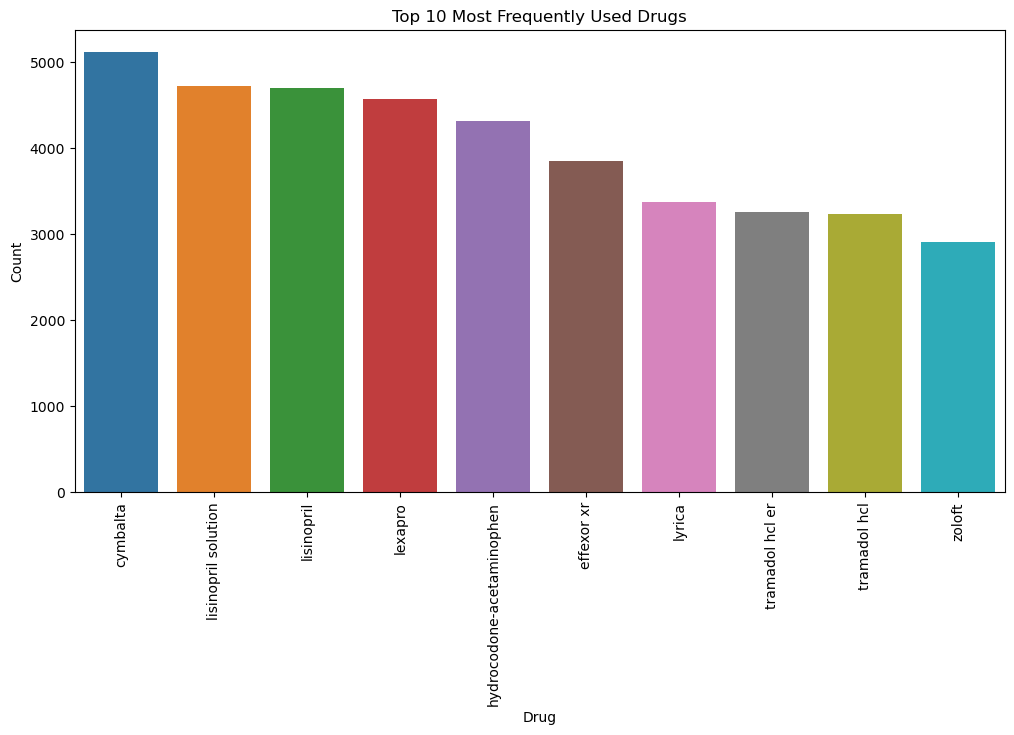

In [15]:
# Countplot of the most frequently used drugs
plt.figure(figsize=(12, 6))
sns.countplot(x="Drug", data=full_data, order=full_data["Drug"].value_counts().index[:10])
plt.title("Top 10 Most Frequently Used Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

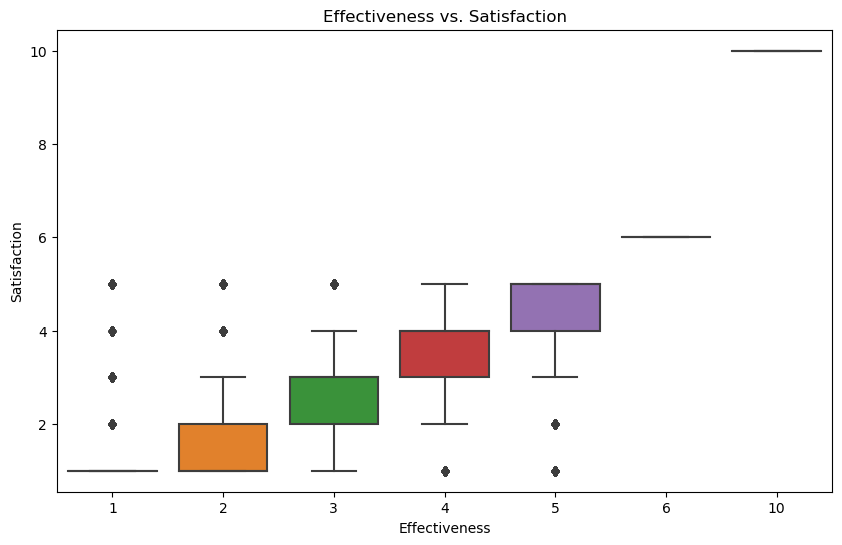

In [16]:
#Boxplot of effectiveness vs. satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x="Effectiveness", y="Satisfaction", data=full_data)
plt.title("Effectiveness vs. Satisfaction")
plt.xlabel("Effectiveness")
plt.ylabel("Satisfaction")
plt.show()

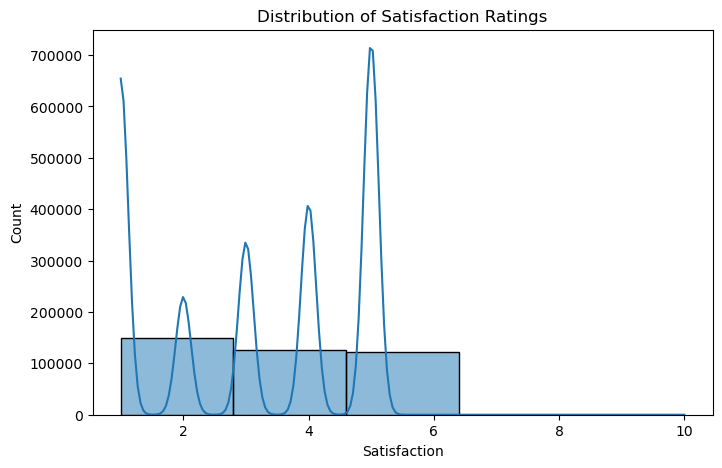

In [17]:
# Distribution of satisfaction
plt.figure(figsize=(8, 5))
sns.histplot(full_data["Satisfaction"], bins=5, kde=True)
plt.title("Distribution of Satisfaction Ratings")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

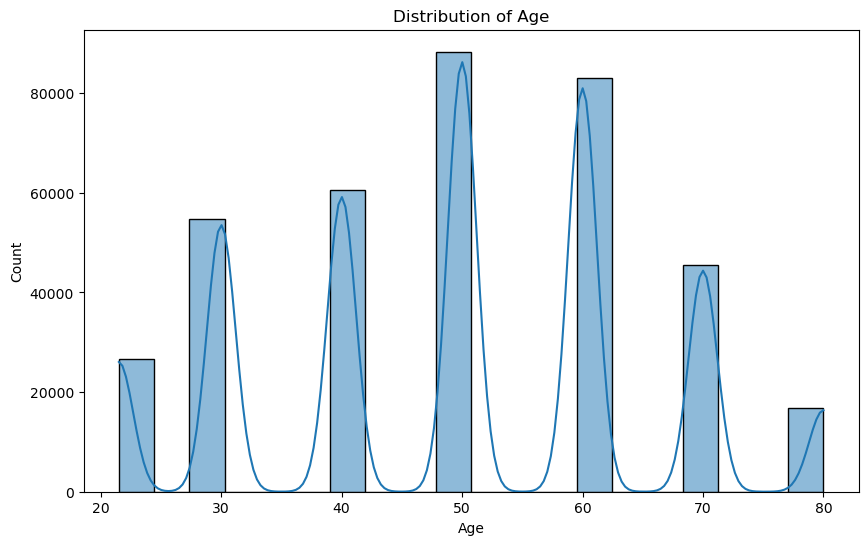

In [18]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(full_data["Age"], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Users')

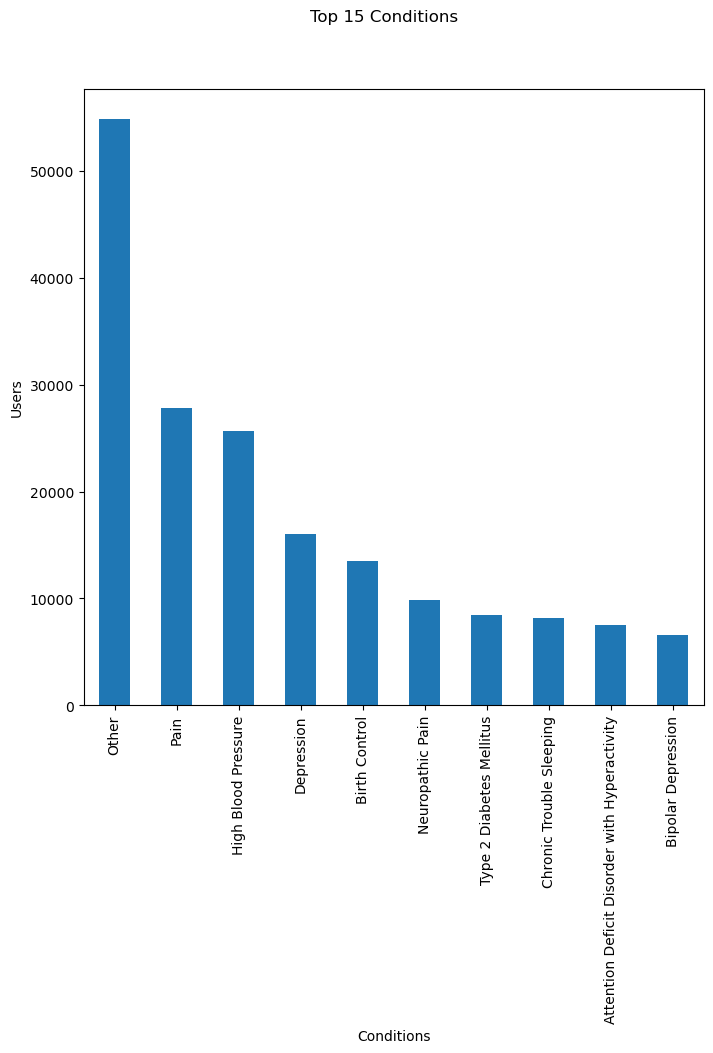

In [19]:
# Barplot of top 15 conditions
full_data['Condition'].value_counts().nlargest(10).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

In [20]:
# Creates a new DataFrame 'lis_data' by selecting rows from 'full_data' where the 'DrugId' column is equal to 6873.
lis_data=full_data[full_data.DrugId == 6873]

In [21]:
lis_data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sides,UsefulCount,Gender,Name,Race
9197,NaN,High Blood Pressure,2/29/2020,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,"Dizziness , lightheadedness , tiredness, or ...",14,,Ronald Brown,Asian
9203,80.0,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,"Dizziness , lightheadedness , tiredness, or ...",3,Female,Daniel Martinez,Hispanic
9209,60.0,High Blood Pressure,1/14/2020,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,"Dizziness , lightheadedness , tiredness, or ...",3,Male,Andrew Mooney,Black
9215,70.0,High Blood Pressure,10/17/2019,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,"Dizziness , lightheadedness , tiredness, or ...",6,Male,Courtney Hess,White
9221,60.0,High Blood Pressure,10/13/2019,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,"Dizziness , lightheadedness , tiredness, or ...",12,Male,Anthony Schultz,Black


In [22]:
# Calculates the sum of missing (NaN) values for each column in the 'lis_data'
lis_data.isna().sum()

Age              304
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews            4
Satisfaction       0
Sides              0
UsefulCount        0
Gender             0
Name               0
Race               0
dtype: int64

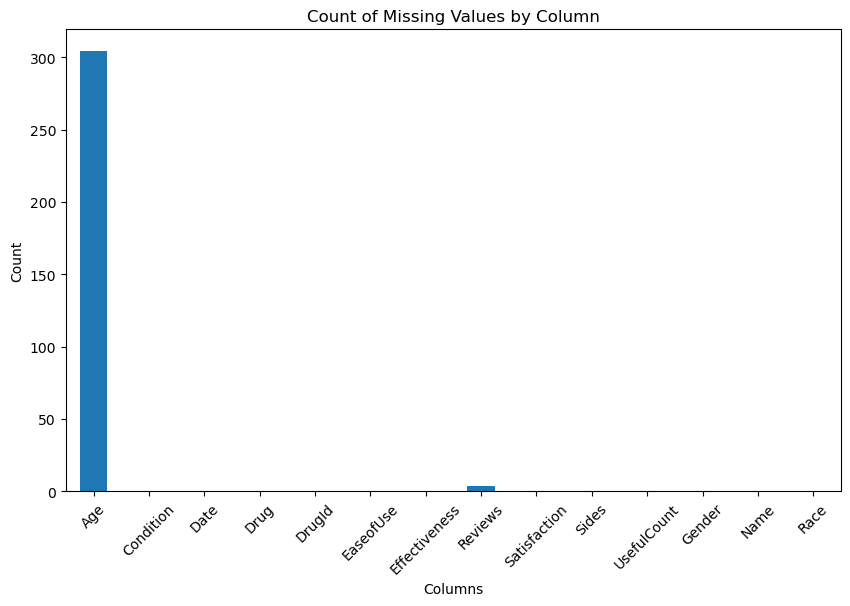

In [23]:
mis_vals = lis_data.isnull().sum()
# Create a bar plot to visualize the count of missing values
plt.figure(figsize=(10, 6))
mis_vals.plot(kind='bar')
plt.title('Count of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Imputes missing (NaN) values in the 'Age' column of the 'lis_data' with the median value of the same column.
lis_data.loc[lis_data['Age'].isnull(), 'Age'] = lis_data['Age'].median()


In [25]:
# Removes rows from the 'lis_data' DataFrame where the 'Reviews' column contains missing (NaN) values.
lis_data = lis_data.dropna(subset=["Reviews"])

In [26]:
lis_data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sides            0
UsefulCount      0
Gender           0
Name             0
Race             0
dtype: int64

In [27]:
# Handling instances with whitespaces
for i in lis_data:
    lis_data[i]=np.where(lis_data[i]==" ",np.NAN,lis_data[i])
    
lis_data.isna().sum()

Age                 0
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1716
Satisfaction        0
Sides               0
UsefulCount         0
Gender            548
Name                0
Race                0
dtype: int64

In [28]:
#removal of rows with missing (NaN) values in the 'lis_data'
lis_data.dropna(axis=0, inplace = True)
lis_data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sides            0
UsefulCount      0
Gender           0
Name             0
Race             0
dtype: int64

In [29]:
# Creates a new column 'Sideeffects' in the 'lis_data' DataFrame by mapping values from the 'Satisfaction' column 
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
lis_data['Sideeffects'] = lis_data['Satisfaction'].map(mapping)

In [30]:
lis_data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sides,UsefulCount,Gender,Name,Race,Sideeffects
9203,80.0,High Blood Pressure,2/8/2020,lisinopril solution,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,"Dizziness , lightheadedness , tiredness, or ...",3.0,Female,Daniel Martinez,Hispanic,2
9209,60.0,High Blood Pressure,1/14/2020,lisinopril solution,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,"Dizziness , lightheadedness , tiredness, or ...",3.0,Male,Andrew Mooney,Black,2
9215,70.0,High Blood Pressure,10/17/2019,lisinopril solution,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,"Dizziness , lightheadedness , tiredness, or ...",6.0,Male,Courtney Hess,White,1
9221,60.0,High Blood Pressure,10/13/2019,lisinopril solution,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,"Dizziness , lightheadedness , tiredness, or ...",12.0,Male,Anthony Schultz,Black,4
9227,60.0,High Blood Pressure,8/16/2019,lisinopril solution,6873.0,3.0,1.0,Was on this medicine for about 2 months and ha...,1.0,"Dizziness , lightheadedness , tiredness, or ...",22.0,Female,Jennifer Haas,Asian,5


## EDA on Lisinopril

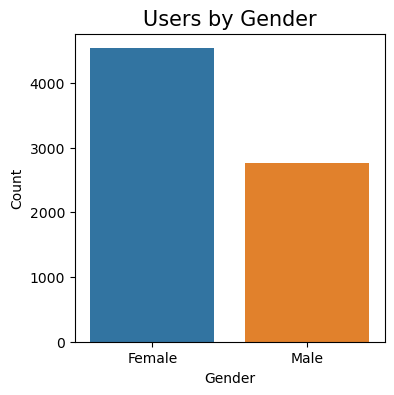

In [31]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Gender', data=lis_data)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.show()

### Female users are predominant users of this drug.

Text(0, 0.5, 'Count')

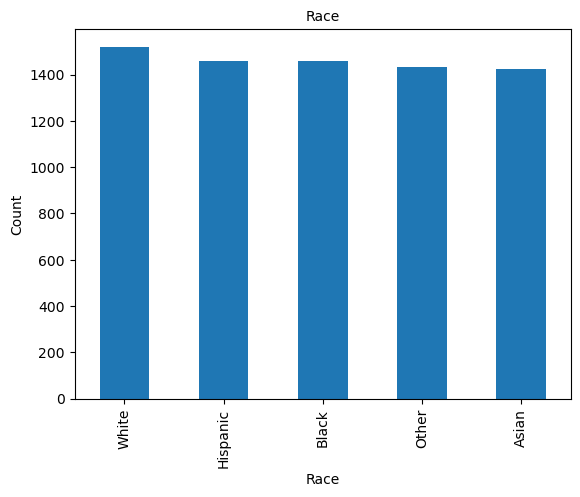

In [32]:
lis_data['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0.5, 1.0, 'Users by Race and Gender')

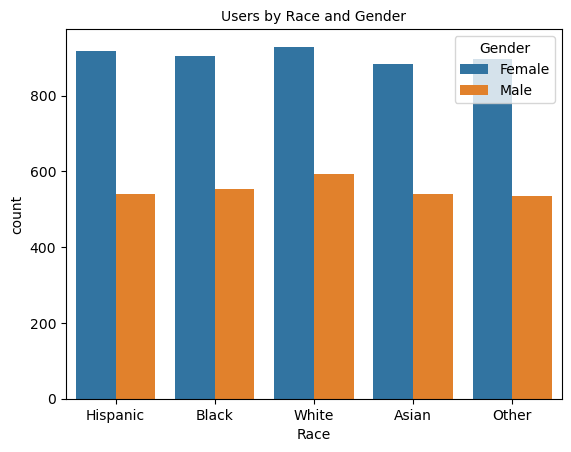

In [33]:
sns.countplot(x='Race',hue='Gender',data=lis_data)
plt.title("Users by Race and Gender", fontsize = 10)

Text(0.5, 1.0, 'Users by Age and Gender')

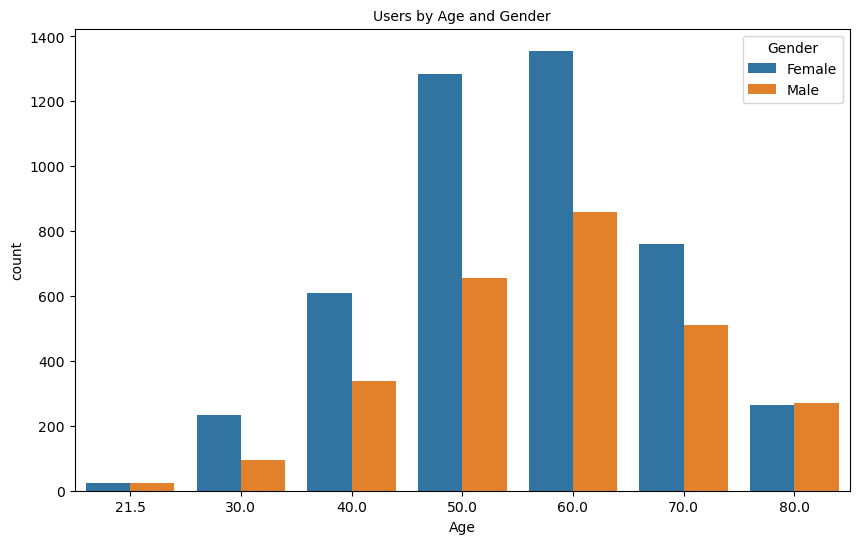

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Gender',data=lis_data)
plt.title("Users by Age and Gender", fontsize = 10)

Text(0, 0.5, 'Count')

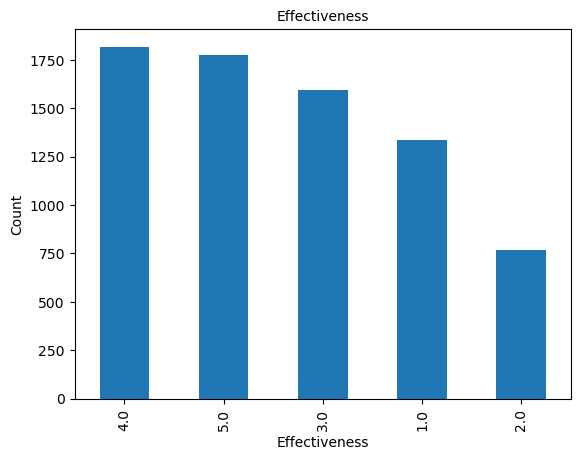

In [35]:
lis_data['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

<Figure size 1000x800 with 0 Axes>

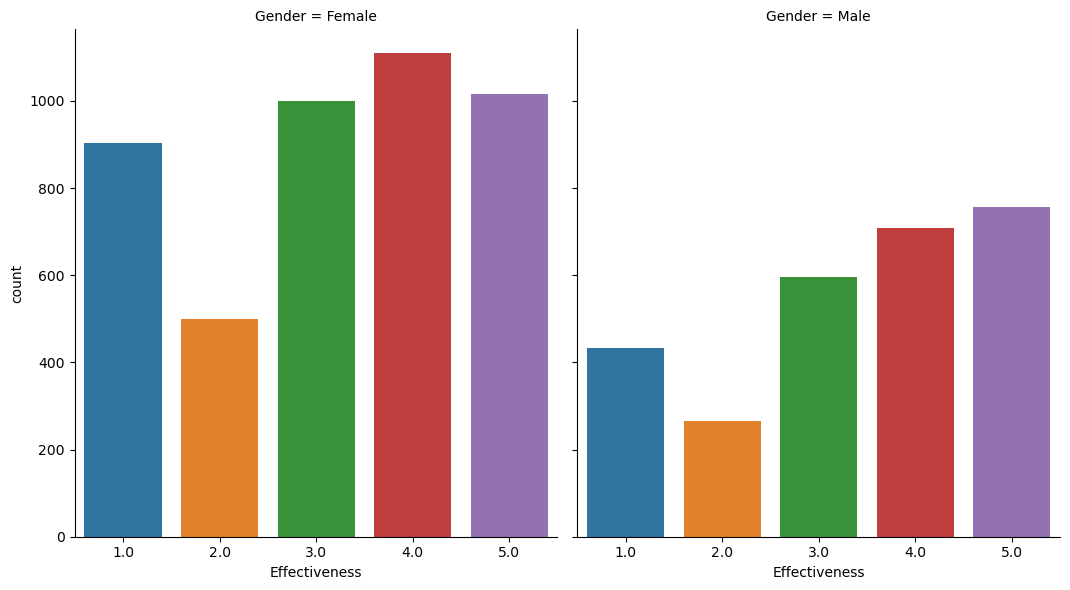

In [36]:
plt.figure(figsize=(10,8))
lis= sns.catplot(x="Effectiveness",col="Gender",data=lis_data, kind="count",height=6,aspect =.9)

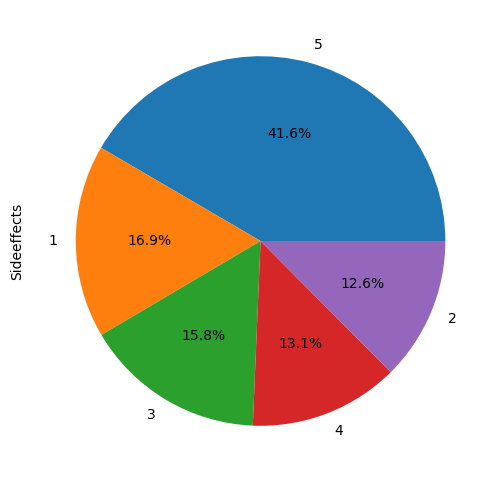

In [37]:
plt.figure(figsize=(6,6))
lis_data['Sideeffects'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


<Axes: xlabel='Age', ylabel='count'>

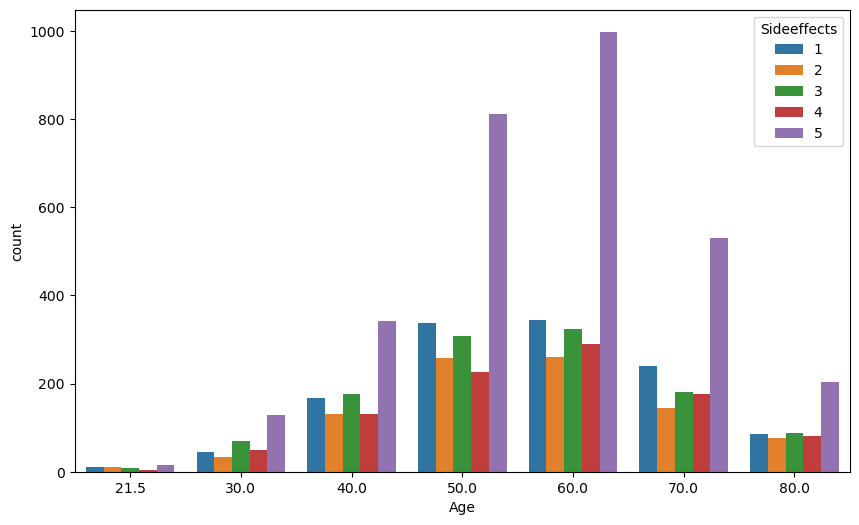

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffects',data=lis_data)

<Figure size 2000x1000 with 0 Axes>

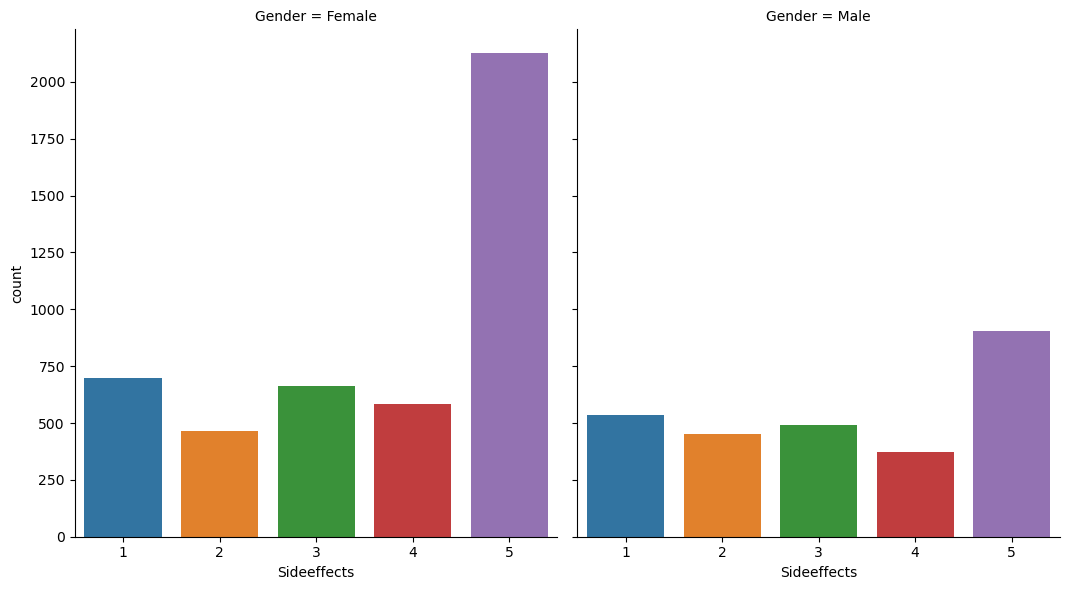

In [39]:
plt.figure(figsize=(20,10))
gen_effect= sns.catplot(x="Sideeffects",col="Gender",data=lis_data, kind="count",height=6,aspect =.9)

<Axes: xlabel='Race', ylabel='count'>

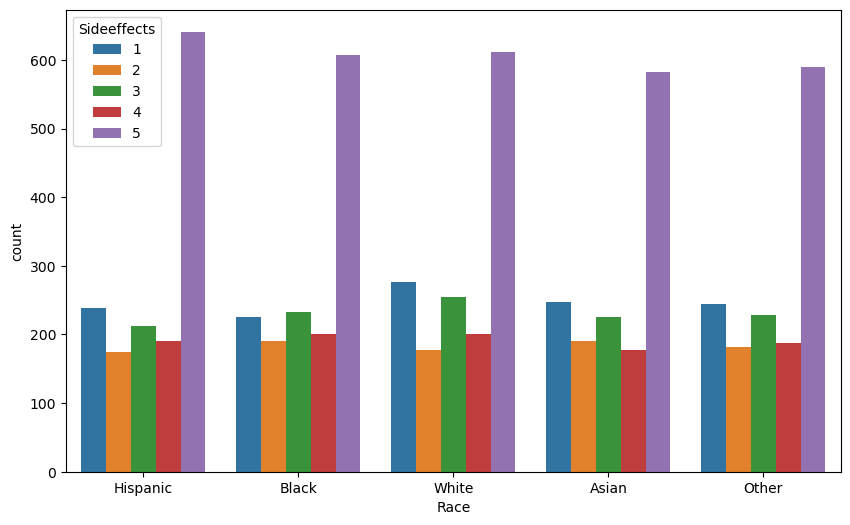

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffects',data=lis_data)

In [41]:
#Removal of specified columns ('Date', 'Drug', 'DrugId', 'Reviews', 'Sides') from the 'lis_data'
columns_to_drop=['Date', 'Drug', 'DrugId','Reviews','Sides']
lis_data.drop(columns=columns_to_drop,inplace=True)

In [42]:
# Resets the index of the 'lis_data' DataFrame
lis_data.reset_index(drop=True, inplace=True)

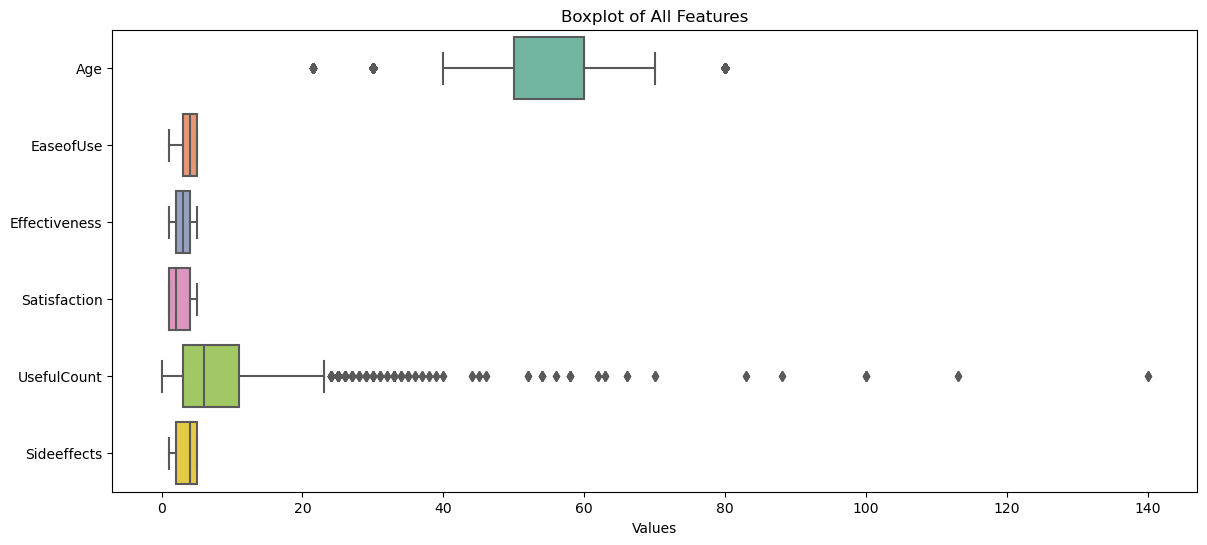

In [43]:
# Create a boxplot for all features in the dataset
plt.figure(figsize=(14, 6))
sns.boxplot(data=lis_data, orient="h", palette="Set2")
plt.title('Boxplot of All Features')
plt.xlabel('Values')
plt.show()


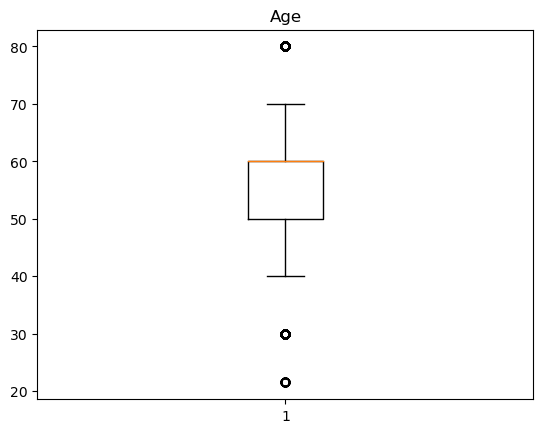

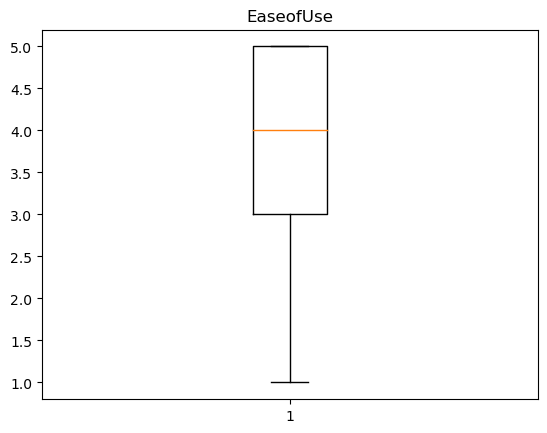

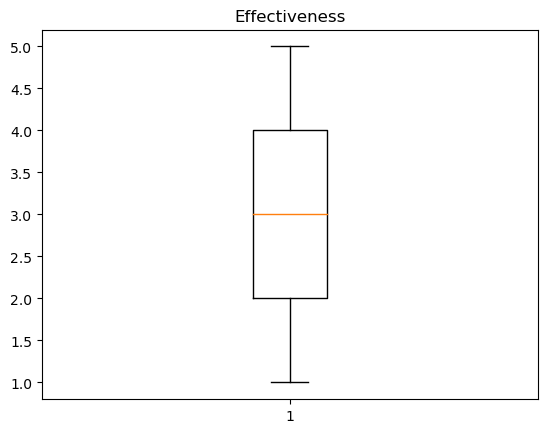

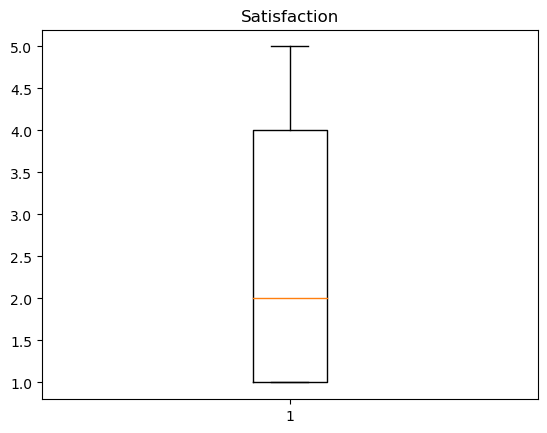

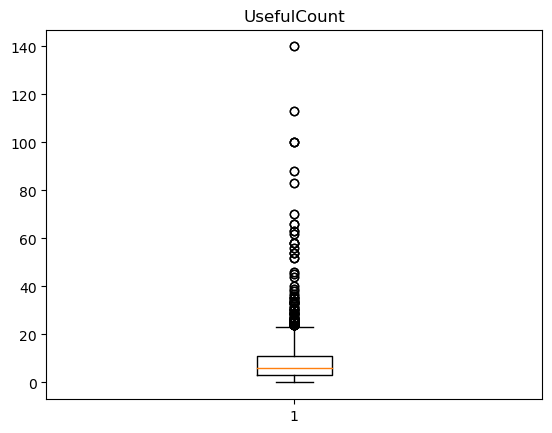

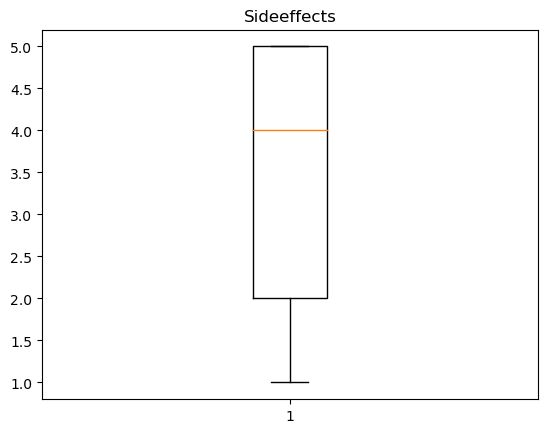

In [44]:
#plotting boxplots of all the numerical columns in the dataset
num_data=['Age', 'EaseofUse',
       'Effectiveness', 'Satisfaction', 'UsefulCount', 'Sideeffects']
for i in num_data:                                    
    plt.figure()
    plt.boxplot(lis_data[i])
    plt.title(i)


### Outlier Handling of column 'Age'

In [96]:
# Handling Outliers in 'Age' column using flooring and capping technique
Q1=np.percentile(lis_data['Age'],25,interpolation='midpoint')     # finding first quartile
Q2=np.percentile(lis_data['Age'],50,interpolation='midpoint')     #finding second quartile
Q3=np.percentile(lis_data['Age'],75,interpolation='midpoint')     #finding third quartile
warnings.filterwarnings('ignore')
IQR=Q3-Q1
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
lis_data['Age']=np.where(lis_data['Age']>up_lim,up_lim,np.where(lis_data['Age']<low_lim,low_lim,lis_data['Age']))

### Outlier Handling of 'UsefulCount'

In [46]:
# Handling outliers in'UsefulCount' column using RobustScaler 
scaler=RobustScaler()
lis_data['UsefulCount']=scaler.fit_transform(lis_data[['UsefulCount']])


### For the columns 'Age', we apply flooring and mapping to handle the outliers . Since there are more no: of outliers in 'UsefulCount', and the data in that column are significantly important, we applied RobustScaler technique. This technique mitigates the influence of outliers on the data.

In [47]:
# This dictionary maps numerical ratings (1 to 5) to descriptive labels that represent the severity of side effects
rating_labels = {
    1: "No Side Effects",
    2: "Mild Side Effects",
    3: "Moderate Side Effects",
    4: "Strong Side effects",
    5: "Extreme Side Effects"
}

In [48]:
# Transforms the numerical 'Sideeffects' column in 'lis_data' into human-readable labels using the 'rating_labels'
lis_data['Sideeffects'] = lis_data['Sideeffects'].map(rating_labels)

In [49]:
#Removal of 'Name' column
lis_data.drop('Name',axis=1,inplace=True)

## Encoding Categorical Features

In [50]:
# Label Encoding categorical columns,"Condition", "Race", "Sideeffects"
le = LabelEncoder()
cat_col = ["Condition", "Race", "Sideeffects"]
for column in cat_col:
    lis_data[column] = le.fit_transform(lis_data[column])

In [51]:
#One-hot Encoding 'Gender' column
data_final=pd.get_dummies(lis_data, columns=["Gender"])

In [52]:
data_final.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Race,Sideeffects,Gender_Female,Gender_Male
0,75.0,4,5.0,4.0,4.0,-0.375,2,1,1,0
1,60.0,4,4.0,5.0,4.0,-0.375,1,1,0,1
2,70.0,4,5.0,5.0,5.0,0.000,4,3,0,1
3,60.0,4,2.0,4.0,2.0,0.750,1,4,0,1
4,60.0,4,3.0,1.0,1.0,2.000,0,0,1,0


## Splitting the data into Train and Test subsets

In [53]:
X=data_final.drop(['Sideeffects'],axis=1) #predictor variable or independent variable
y=data_final['Sideeffects'] # target or dependent variable

In [54]:
#Splitting the data into training and testing tests
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Modelling

## Implementing Logistic Regression Model

In [55]:
logit_model=LogisticRegression() #creating an instance of Logistic Regression class 
logit_model.fit(X_train,y_train) # fitting a Logistic Regression model to the training data
y_pred_lr=logit_model.predict(X_test) # predicting the target variable values

In [56]:
## Evaluating the logistic regression model by finding the metrics
print("Precision score: ",precision_score(y_test,y_pred_lr,average='micro'))
print("recall :",recall_score(y_test,y_pred_lr,average='micro'))
print("f1 :",f1_score(y_test,y_pred_lr,average='micro'))
print("accuracy :",accuracy_score(y_test,y_pred_lr))

Precision score:  0.9018102029621503
recall : 0.9018102029621503
f1 : 0.9018102029621503
accuracy : 0.9018102029621503


In [57]:
# Manually create a test data point
test_data = [
    [60,4,3.0,1.0,1.0,2.000,1,0,2]
]

# Make predictions using your logistic regression model
predicted_class = logit_model.predict(test_data)

# Define a mapping to convert the encoded predictions back to labels
side_effect_mapping = {
    0: "No Side Effects",
    1: "Mild Side Effects",
    2: "Moderate Side Effects",
    3: "Strong Side Effects",
    4: "Extreme Side Effects"
}

# Get the corresponding side effect label based on the prediction
side_effect= side_effect_mapping[predicted_class[0]]

# Print the prediction
print("The model predicts:",side_effect)

The model predicts: No Side Effects


In [58]:
# Generates and prints a classification report for evaluating the performance of the model
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       753
           1       0.74      0.69      0.72       222
           2       0.81      0.79      0.80       279
           3       0.85      0.96      0.90       326
           4       0.93      0.86      0.89       243

    accuracy                           0.90      1823
   macro avg       0.87      0.86      0.86      1823
weighted avg       0.90      0.90      0.90      1823



## Implementing k-NN Model

In [59]:
#calculate and store the accuracy scores for different values of 'k' in the metric list.
metric=[]
neighbors=np.arange(3,15)

for k in neighbors:
    knn_model=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    knn_model.fit(X_train,y_train)
    y_pred_knn=knn_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

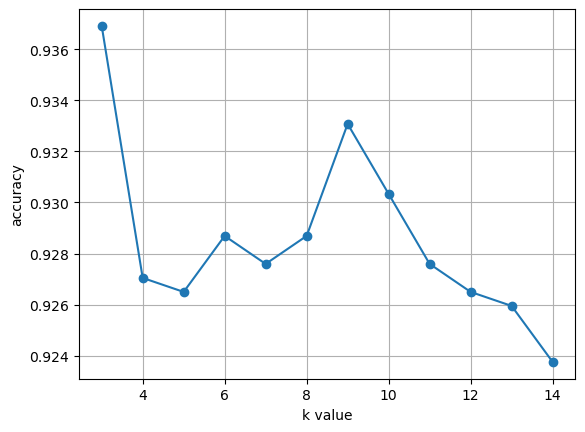

In [60]:
#Plotting accuracy scores against the no: of neighbors
#Determines the optimal no: of neighbors of this model
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [61]:
# creating a k-NN classifier with n_neighbors=3
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) 
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)


In [62]:
# Evaluating the k-NN modelby finding the metrics
print("Precision score: ",precision_score(y_test,y_pred_knn,average='micro'))
print("recall :",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 :",f1_score(y_test,y_pred_knn,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_knn))

Precision score:  0.9369171695008228
recall : 0.9369171695008228
f1 : 0.9369171695008228
Accuracy : 0.9369171695008228


In [63]:
# Manually create a test data point
test_data = [
    [70.0,4,5.0,5.0,5.0,0.000,3,0,1]
]

# Make predictions using your k-NN model
predicted_class = knn_model.predict(test_data)

# Define a mapping to convert the encoded predictions back to labels
side_effect_mapping = {
    0: "No Side Effects",
    1: "Mild Side Effects",
    2: "Moderate Side Effects",
    3: "Strong Side Effects",
    4: "Extreme Side Effects"
}

# Get the corresponding side effect label based on the prediction
side_effect= side_effect_mapping[predicted_class[0]]

# Print the prediction
print("The model predicts:",side_effect)

The model predicts: Strong Side Effects


In [64]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       753
           1       0.90      0.92      0.91       222
           2       0.94      0.91      0.92       279
           3       0.97      0.97      0.97       326
           4       0.89      0.83      0.86       243

    accuracy                           0.94      1823
   macro avg       0.93      0.92      0.92      1823
weighted avg       0.94      0.94      0.94      1823



## Implementing SVM Classifier Model with kernel='poly'

In [65]:
svm_model=SVC(kernel='poly') # creating an instance SVC class with kernel='poly'
svm_model.fit(X_train,y_train)

SVC(kernel='poly')

In [66]:
y_pred_svm=svm_model.predict(X_test)

In [67]:
# Evaluating the SVM Classifier model with kernel='poly' by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_svm,average='micro'))
print("Recall :",recall_score(y_test,y_pred_svm,average='micro'))
print("f1 :",f1_score(y_test,y_pred_svm,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_svm))

Precision score:  0.8431157432803071
Recall : 0.8431157432803071
f1 : 0.8431157432803071
Accuracy : 0.8431157432803071


In [68]:
# Manually create a test data point
test_data = [
    [70.0,4,5.0,5.0,5.0,0.000,3,0,1]
]

# Make predictions using SVM Classifier Model with kernel='poly'
predicted_class = svm_model.predict(test_data)

# Define a mapping to convert the encoded predictions back to labels
side_effect_mapping = {
    0: "No Side Effects",
    1: "Mild Side Effects",
    2: "Moderate Side Effects",
    3: "Strong Side Effects",
    4: "Extreme Side Effects"
}

# Get the corresponding side effect label based on the prediction
side_effect= side_effect_mapping[predicted_class[0]]

# Print the prediction
print("The model predicts:",side_effect)

The model predicts: Strong Side Effects


In [69]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       753
           1       0.97      0.55      0.70       222
           2       0.78      0.75      0.77       279
           3       0.87      0.98      0.92       326
           4       0.99      0.56      0.71       243

    accuracy                           0.84      1823
   macro avg       0.88      0.77      0.80      1823
weighted avg       0.86      0.84      0.83      1823



## Implementing Decision Tree  Classifier Model

In [70]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)

In [71]:
# Evaluating the Decision Tree Classifier model by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_dt,average='micro'))
print("Recall :",recall_score(y_test,y_pred_dt,average='micro'))
print("f1 :",f1_score(y_test,y_pred_dt,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_dt))

Precision score:  1.0
Recall : 1.0
f1 : 1.0
Accuracy : 1.0


In [72]:
# Manually create a test data point
test_data = [
    [70.0,4,5.0,5.0,5.0,0.000,3,0,1]
]

# Make predictions using your Decision Tree Model
predicted_class = dt_model.predict(test_data)

# Define a mapping to convert the encoded predictions back to labels
side_effect_mapping = {
    0: "No Side Effects",
    1: "Mild Side Effects",
    2: "Moderate Side Effects",
    3: "Strong Side Effects",
    4: "Extreme Side Effects"
}

# Get the corresponding side effect label based on the prediction
side_effect= side_effect_mapping[predicted_class[0]]

# Print the prediction
print("The model predicts:",side_effect)

The model predicts: Strong Side Effects


In [73]:
conf_matrix=confusion_matrix(y_test,y_pred_dt)
print(" Confusion Matrix:",conf_matrix)

 Confusion Matrix: [[753   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 279   0   0]
 [  0   0   0 326   0]
 [  0   0   0   0 243]]


In [74]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       243

    accuracy                           1.00      1823
   macro avg       1.00      1.00      1.00      1823
weighted avg       1.00      1.00      1.00      1823



## Implementing Random Forest Model

In [75]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred_rf=rf_model.predict(X_test)

In [77]:
# Evaluating the Random Forest Classifier model by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_rf,average='micro'))
print("Recall :",recall_score(y_test,y_pred_rf,average='micro'))
print("f1 :",f1_score(y_test,y_pred_rf,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_rf))

Precision score:  1.0
Recall : 1.0
f1 : 1.0
Accuracy : 1.0


In [78]:
conf_matrix=confusion_matrix(y_test,y_pred_rf)
print(" Confusion Matrix:",conf_matrix)

 Confusion Matrix: [[753   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 279   0   0]
 [  0   0   0 326   0]
 [  0   0   0   0 243]]


In [79]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       243

    accuracy                           1.00      1823
   macro avg       1.00      1.00      1.00      1823
weighted avg       1.00      1.00      1.00      1823



## Implementing SVM Classifier Model with kernel='linear'

In [80]:
from sklearn.svm import SVC
svm_lmodel = SVC(kernel='linear')
svm_lmodel.fit(X_train, y_train)
y_pred_svml=svm_lmodel.predict(X_test)

In [81]:
# Evaluating the SVM Classifier model with kernel='linear' by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_svml,average='micro'))
print("Recall :",recall_score(y_test,y_pred_svml,average='micro'))
print("f1 :",f1_score(y_test,y_pred_svml,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_svml))

Precision score:  1.0
Recall : 1.0
f1 : 1.0
Accuracy : 1.0


In [82]:
conf_matrix=confusion_matrix(y_test,y_pred_svml)
print(" Confusion Matrix:",conf_matrix)

 Confusion Matrix: [[753   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 279   0   0]
 [  0   0   0 326   0]
 [  0   0   0   0 243]]


In [83]:
print(classification_report(y_test,y_pred_svml))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       243

    accuracy                           1.00      1823
   macro avg       1.00      1.00      1.00      1823
weighted avg       1.00      1.00      1.00      1823



## Implementing Gradient Boosting Classifier Model

In [84]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb=gb_model.predict(X_test)

In [85]:
# Evaluating the Gradient Classifier model by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_gb,average='micro'))
print("Recall :",recall_score(y_test,y_pred_gb,average='micro'))
print("f1 :",f1_score(y_test,y_pred_gb,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_gb))

Precision score:  1.0
Recall : 1.0
f1 : 1.0
Accuracy : 1.0


In [86]:
conf_matrix=confusion_matrix(y_test,y_pred_gb)
print(" Confusion Matrix:",conf_matrix)

 Confusion Matrix: [[753   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 279   0   0]
 [  0   0   0 326   0]
 [  0   0   0   0 243]]


In [87]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       243

    accuracy                           1.00      1823
   macro avg       1.00      1.00      1.00      1823
weighted avg       1.00      1.00      1.00      1823



## Implementing SVM Classifier Model with kernel='rbf'

In [88]:
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_train, y_train)
y_pred_svmrbf=svm_rbf_model.predict(X_test)

In [89]:
# Evaluating the SVM Classifier model with kernel='rbf' by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_svmrbf,average='micro'))
print("Recall :",recall_score(y_test,y_pred_svmrbf,average='micro'))
print("f1 :",f1_score(y_test,y_pred_svmrbf,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_svmrbf))

Precision score:  0.743828853538124
Recall : 0.743828853538124
f1 : 0.7438288535381239
Accuracy : 0.743828853538124


In [90]:
print(classification_report(y_test,y_pred_svmrbf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       753
           1       0.00      0.00      0.00       222
           2       0.61      1.00      0.75       279
           3       0.78      0.99      0.88       326
           4       0.00      0.00      0.00       243

    accuracy                           0.74      1823
   macro avg       0.44      0.60      0.50      1823
weighted avg       0.56      0.74      0.64      1823



## Implementing XGBoost Classifier

In [91]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [92]:
# Evaluating the XGBoost Classifier model by finding the metric
print("Precision score: ",precision_score(y_test,y_pred_xgb,average='micro'))
print("Recall :",recall_score(y_test,y_pred_xgb,average='micro'))
print("f1 :",f1_score(y_test,y_pred_xgb,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_xgb))

Precision score:  1.0
Recall : 1.0
f1 : 1.0
Accuracy : 1.0


In [93]:
conf_matrix=confusion_matrix(y_test,y_pred_xgb)
print(" Confusion Matrix:",conf_matrix)

 Confusion Matrix: [[753   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 279   0   0]
 [  0   0   0 326   0]
 [  0   0   0   0 243]]


In [94]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       243

    accuracy                           1.00      1823
   macro avg       1.00      1.00      1.00      1823
weighted avg       1.00      1.00      1.00      1823



## Cross Validation

In [95]:
# Create a list of classification models
models = [
    ("Random Forest",rf_model),
    ("Gradient Boosting", gb_model),
    ("Support Vector Classifier kernel='poly'", svm_model),
    ("Support Vector Classifier kernel='linear'",svm_lmodel),
    ("Support Vector Classifier kernel='rbf'",svm_rbf_model),
    ("K-Nearest Neighbors", knn_model),
    ("Decision Tree", dt_model),
    ("Logistic Regression", logit_model),
     ("XGBoost Classifier",xgb_model)
    ]

# Create dictionaries to store cross-validation results
kfold_results = {}
stratified_kfold_results = {}

# Set the number of folds
k = 10  # Change this to the desired number of folds

# Set up k-fold and stratified k-fold cross-validation
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the scoring method (you can change this to other scoring methods)
from sklearn.metrics import make_scorer
scorer = make_scorer(accuracy_score)  # Change to accuracy_score, etc., as needed

# Loop through the models and perform cross-validation
for model_name, model in models:
    # K-Fold Cross-Validation
    kfold_scores = cross_val_score(model, X, y, cv=kfold, scoring=scorer)
    kfold_results[model_name] = kfold_scores

    # Stratified K-Fold Cross-Validation
    stratified_kfold_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring=scorer)
    stratified_kfold_results[model_name] = stratified_kfold_scores

# Print the results
for model_name, model in models:
    print(f"{model_name} K-Fold Cross-Validation Accuracy Score: {kfold_results[model_name].mean():.2f}")
    print(f"{model_name} Stratified K-Fold Cross-Validation Accuracy Score: {stratified_kfold_results[model_name].mean():.2f}")


Random Forest K-Fold Cross-Validation Accuracy Score: 1.00
Random Forest Stratified K-Fold Cross-Validation Accuracy Score: 1.00
Gradient Boosting K-Fold Cross-Validation Accuracy Score: 1.00
Gradient Boosting Stratified K-Fold Cross-Validation Accuracy Score: 1.00
Support Vector Classifier kernel='poly' K-Fold Cross-Validation Accuracy Score: 0.88
Support Vector Classifier kernel='poly' Stratified K-Fold Cross-Validation Accuracy Score: 0.88
Support Vector Classifier kernel='linear' K-Fold Cross-Validation Accuracy Score: 1.00
Support Vector Classifier kernel='linear' Stratified K-Fold Cross-Validation Accuracy Score: 1.00
Support Vector Classifier kernel='rbf' K-Fold Cross-Validation Accuracy Score: 0.74
Support Vector Classifier kernel='rbf' Stratified K-Fold Cross-Validation Accuracy Score: 0.74
K-Nearest Neighbors K-Fold Cross-Validation Accuracy Score: 0.94
K-Nearest Neighbors Stratified K-Fold Cross-Validation Accuracy Score: 0.94
Decision Tree K-Fold Cross-Validation Accuracy S